# Lecture 1: Linear Algebra and Least Squares

## Minimization Programs

### Definitions:
We start with a set of points $\mathcal{X}$ which we call the **feasible points** or **feasible region** or **domain of optimization**, and a real-valued function $f:\mathcal{X}\rightarrow\mathbb{R}$ such that $f(x)$ is the cost of choosing $x\in X$. 

For example, $\mathcal{X}$ could be the colors of the rainbow and $f(x)$ could be the cost of producing one million plastic toys having color $x$. 


We say that $x^\ast$ is a **minimizer** of $f$ over $\mathcal{X}$ if $f(x^\ast)\leq f(x)$ for all $x\in X$.

The **minimization program**

$$
(P)\hspace{5pt} \min f(x) \text{ subject to } x\in \mathcal{X}
$$

encapsulates the feasible region, the cost function $f$, and the goal of finding a minimizer of $f$ over $\mathcal{X}$. If $x^\ast$ is a minimizer of $f$ over $\mathcal{X}$, we say that $x^\ast$ is a **solution** to the program $(P)$, or **solves** $(P)$.

### Example:

Let $\mathcal{X}=\mathbb{R}$ and $f(x) = x^2-2x$. 
1. Does $\min f(x)\text{ subject to }x\in\mathbb{R}$ have a solution?
2. How can you find a solution?
3. Is the solution you found the only possible solution?

## Least squares regression

Suppose one is give data $\{(x_i, y_i)\}_{i=1}^N$ with $x_i\in\mathbb{R}$ and $y_i\in\mathbb{R}$ for $i=1,\ldots, N$. In the following code, the $x_i$'s are nitrogen oxide concentrations over various Standard Metropolitan Statistical Areas (SMSAs) studied in Boston in the 1970's, and $y_i$ is the median housing price in thousands of dollars for the SMSA with index $i$. The nitrogen oxide levels are a measure of pollution in the area.

In [2]:
from sklearn.datasets import load_boston # Import the Boston housing dataset loader

boston = load_boston() # Instantiate the python map object containing the Boston housing dataset and information
print(boston.keys()) # Display the keys of the python map object

dict_keys(['DESCR', 'data', 'target', 'feature_names'])


In [3]:
print(boston.DESCR) # Display a description of the dataset

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
x = boston.data[:, 4] # Set the x_i's to be the nitrogen oxide levels
print(x.shape) # Show the number of points of the data

(506,)


In [5]:
y = boston.target # Set the y_i's to be the nitrogen oxide levels
print(y.shape) # Show the number of responses

(506,)


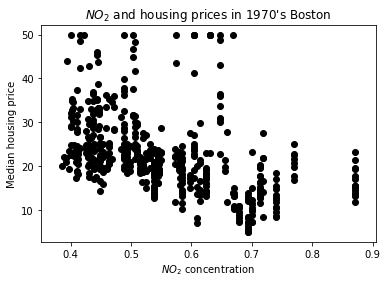

In [6]:
import matplotlib.pyplot as plt # Import the main plotting library

plt.scatter(x,y,color='black') # Create a scatter plot
plt.title('$NO_2$ and housing prices in 1970\'s Boston') # Set title of the plot, illustrate that pyplot recognizes LaTeX syntax
plt.xlabel('$NO_2$ concentration') # Set x-axis label
plt.ylabel('Median housing price') # Set y-axis label
plt.show()

In linear regression, we seek real numbers $\beta_0$ and $\beta_1$ such that

$$
y_i \approx \beta_0 + \beta_1 x_i
$$

for each $i=1,\ldots, N$. For the nitrogen oxide concentrations and housing prices, finding $\beta_0$ and $\beta_1$ may tell us if pollution impacts housing price. Intuitively, higher pollution should produce lower housing prices, and the scatter plot suggests that this is the case. However, having a quantitative model for the impact may be useful for specifying policy targets.


Mathematically, seek a line that explains $y_i$ in terms of $x_i$, where $\beta_0$ is the $y$-intercept and $\beta_1$ is the slope of the line.

We need a way of judging the cost of using a particular pair $(\beta_0, \beta_1)$ for this goal. A simple cost function for using $(\beta_0, \beta_1)$ for an individual point would be

$$
(y_i - \beta_0 -\beta_1 x_i)^2.
$$

This function is $0$ exactly when $y_i = \beta_0 + \beta_1 x_i$, and grows larger as $\beta_0+\beta_1 x_i$ diverges from $y_i$. Of course, the cost should be shared across all data points, so we sum all of these individual cost functions to obtain the **sum of squares error function**

$$
SSE(\beta_0, \beta_1) = \sum_{i=1}^N(y_i - \beta_0 -\beta_1 x_i)^2.
$$

We then seek $\beta_0^\ast$ and $\beta_1^\ast$ which solve the program

$$
\min SSE(\beta_0,\beta_1) \text{ subject to } (\beta_0, \beta_1)\in \mathbb{R}^2,
$$

where $\mathbb{R}^2$ is the Euclidean/Cartesian plane. This is called **least squares regression**.

We can characterize solutions to this program using just matrix algebra.


## Matrix Arithmetic

A **matrix** is a 2D array of numbers. For example,

$$
\begin{pmatrix} 1 & \pi\\ -4 & -1\\ e & 1\end{pmatrix}
$$

is a $3$ by $2$ matrix. We say that it has three rows and two columns.

We let $\mathbb{R}^{m\times n}$ denote the set of all $m$ by $n$ matrices with real entries. So, if $A\in \mathbb{R}^{m\times n}$, we have that

$$
A = \begin{pmatrix} a_{1,1} & a_{1,2} & \cdots & a_{1, n}\\ a_{2,1} & a_{2, 2} &\cdots & a_{2, n}\\\vdots &\vdots &\ddots & \vdots\\ a_{m, 1} & a_{m, 2} & \cdots & a_{m,n}\end{pmatrix}
$$

where $a_{i,j}$ is the real entry in the $i$th row and $j$th column of $A$.

We can define **entrywise addition** on $\mathbb{R}^{m\times n}$ by setting 

$$
A+B = \begin{pmatrix} a_{1,1} + b_{1,1} & a_{1,2} + b_{1,2} & \cdots & a_{1, n} + b_{1, n}\\ a_{2,1} + b_{2, 1} & a_{2, 2} + b_{2, 2} &\cdots & a_{2, n} + b_{2, n}\\\vdots &\vdots &\ddots & \vdots\\ a_{m, 1} + b_{m, 1} & a_{m, 2} + b_{m, 2} & \cdots & a_{m,n} + b_{m,n}\end{pmatrix}.
$$

This form of addition satisfies several important properties. Let $A, B, C\in \mathbb{R}^{m\times n}$, and let $0$ denote the $m$ by $n$ matrix whose entries are all zeros (note that $0$ is often called the **zero matrix**). Then

1. Associativity: $(A+B)+C = A+(B+C)$
2. Commutativity: $A+B=B+A$
3. Identity: $A+0=A$
4. Invertibility: the matrix $-A$ (whose $(i,j)$ entry is $-a_{i,j}$) satisfies $A + (-A)=0$

We also define **scalar multiplication** of a real number $\alpha$ with an $m$ by $n$ matrix $A$ by setting

$$
\alpha A = \begin{pmatrix} \alpha a_{1,1} & \alpha a_{1,2} & \cdots & \alpha a_{1, n}\\ \alpha a_{2,1} & \alpha a_{2, 2} &\cdots & \alpha a_{2, n}\\\vdots &\vdots &\ddots & \vdots\\ \alpha a_{m, 1} & \alpha a_{m, 2} & \cdots & \alpha a_{m,n}\end{pmatrix}
$$

Given any $\alpha,\beta\in\mathbb{R}$ and $A, B\in \mathbb{R}^{m\times n}$, the following distributive properties hold:

1. $(\alpha +\beta) A = \alpha A + \beta A$
2. $\alpha (A + B) = \alpha A + \alpha B$

For matrices $A\in \mathbb{R}^{m\times k}$ and $B\in \mathbb{R}^{k\times n}$, we define the **matrix product** of $A$ and $B$ by

$$
AB = \begin{pmatrix} \displaystyle\sum_{i=1}^k a_{1,i}b_{i,1} & \displaystyle\sum_{i=1}^k a_{1,i}b_{i,2} & \cdots & \displaystyle\sum_{i=1}^k a_{1,i}b_{i,n}\\ \displaystyle\sum_{i=1}^k a_{2,i}b_{i,1} & \displaystyle\sum_{i=1}^k a_{2,i}b_{i,2} &\cdots & \displaystyle\sum_{i=1}^k a_{2,i}b_{i,n}\\\vdots &\vdots &\ddots & \vdots\\ \displaystyle\sum_{i=1}^k a_{m,i}b_{i,1} & \displaystyle\sum_{i=1}^k a_{m,i}b_{i,2} & \cdots & \displaystyle\sum_{i=1}^k a_{m,i}b_{i,n}\end{pmatrix}.
$$

That is, the $(i,j)$th entry of $AB$ is obtained by multiplying the entries of the $i$th row of $A$ with the $j$th column of $B$ and summing. Note that $AB$ has the same number of rows as $A$ and the same number of columns as $B$.

This definition only makes sense if the number of colums of $A$ is equal to the number of columns of $B$. We say that matrix multiplication of $A$ with $B$ is **incompatible** if the number of columns of $A$ isn't equal to the number of rows of $B$.

For any $A\in\mathbb{R}^{m\times p}$, $B\in \mathbb{R}^{p\times q}$, and $C\in \mathbb{R}^{q\times n}$, we have the following associative property $(AB)C = A(BC)$. 

On the other hand, the commutative property fails. There are special circumstances when $AB=BA$, but in general we cannot trust that this equivalence holds. In fact, the multiplication of $B$ with $A$ might not even be compatible! Even if it is compatible, $AB$ and $BA$ might have completely different dimensions. 

We do have that scalar multiplication commutes through matrix multiplication. If $\alpha\in\mathbb{R}$ and multiplication of $A$ with $B$ is compatible, then
$$
(\alpha A)B= A(\alpha B).
$$

If $A, B\in \mathbb{R}^{m\times k}$ and $C, D\in \mathbb{R}^{k\times n}$, then the following distributive properties hold:

1. $A(C + D) = AC + AD$
2. $(A+B)C = AC + BC$

Finally, we define the **transpose** of $A$ to be

$$
A^T = \begin{pmatrix} a_{1,1} &  a_{2,1} & \cdots &  a_{m, 1}\\  a_{1,2} &  a_{2, 2} &\cdots &  a_{m, 2}\\\vdots &\vdots &\ddots & \vdots\\  a_{1, n} &  a_{2, n} & \cdots &  a_{m,n}\end{pmatrix}.
$$

That is, the $(i, j)$th entry of $A^T$ is $a_{j, i}$. 

Let $\alpha\in\mathbb{R}$, $A,B\in \mathbb{R}^{m\times n}$, $C\in \mathbb{R}^{m\times k}$, and $D\in \mathbb{R}^{k\times n}$. The following properties hold:

1. $\alpha^T=\alpha$ (think of $\alpha$ as a 1 by 1 matrix)
2. $\left(A^T\right)^T=A$
3. $(A+B)^T = A^T + B^T$
4. $(CD)^T = D^TC^T$.

## Inner product and Norm


A matrix $x\in \mathbb{R}^{d\times 1}$ is called a **column vector** and a matrix $v\in \mathbb{R}^{1\times d}$ is called a **row vector**. Unless otherwise stated, **vector** refers to a column vector, we will use $\mathbb{R}^d$ to denote $\mathbb{R}^{d\times 1}$, and we will suppress the column index. So, $x\in\mathbb{R}^d$ is the same as

$$
x = \begin{pmatrix} x_1\\ x_2\\\vdots\\ x_d\end{pmatrix}
$$

for real numbers $x_1, x_2, \ldots, x_d$.

If $x,y\in\mathbb{R}^d$, we call the scalar quantity

$$
x^Ty = \sum_{i=1}^d x_i y_i
$$

the **inner product** between $x$ and $y$. 

The inner product satisfies the following properties for all $\alpha,\beta\in\mathbb{R}$ and $x,y, z\in\mathbb{R}^d$:

1. Positive Definiteness: $x^T x\geq 0$, and $x^Tx=0$ if and only if $x=0$
2. Symmetry: $x^Ty=y^Tx$
3. Linearity: $(\alpha x + \beta y)^T z = \alpha x^T z + \beta y^T z$ and $z^T(\alpha x+ \beta y)=\alpha z^Tx+\beta z^T y$

### Proving the properties of the inner product

Positive Definiteness is true since we know each $x_i^2\geq 0$, and therefore the sum

$$
x^Tx = \sum_{i=1}^d x_i^2\geq 0
$$

It should be clear that this sum is zero if and only if all the $x_i$'s are zero; if the sum is zero, then any $x_i\not=0$ would be a contradiction, and if each $x_i=0$, then each $x_i^2=0$, and the sum over these is also zero.

Symmetry is true since

$$
x^T y = \sum_{i=1}^d x_i y_i = \sum_{i=1}^d y_i x_i=y^Tx.
$$

Linearity follows from the distributive property of scalar arithmetic. 

### Euclidean norm

We let $\Vert x\Vert = \sqrt{x^Tx}$ denote the **Euclidean norm** of $x\in\mathbb{R}^d$. For now, the norm will just be used as convenient notation since $\Vert x\Vert^2=x^Tx$. One thing to note is that $\Vert x\Vert$ and $\Vert x\Vert^2$ are non-negative, and zero if and only if $x=0$ by positive definiteness of the inner product.

Two important properties that the norm inherits from the inner product are

1. Positivity: $\Vert x\Vert\geq 0$, and $\Vert x\Vert=0$ if and only if $x=0$
2. Homogeneity: $\Vert \alpha x\Vert = \vert \alpha\vert \Vert x\Vert$

Positivity follows from the positive definiteness property of the inner product, and homogeneity follows from the following calculation:

\begin{align}
\Vert \alpha x\Vert &=\sqrt{(\alpha x)^T(\alpha x)}\\
&=\sqrt{x^T\alpha^T\alpha x}\\
&=\sqrt{x^T\alpha^2 x}\\
&=\sqrt{\alpha^2 x^Tx}\\
&=\sqrt{\alpha^2}\sqrt{x^Tx}\\
&=\vert\alpha\vert\Vert x\Vert.
\end{align}

### Example:
The inner product and norm allow us to generalize important formulas from 1D algebra. This example generalizes the formula $(\alpha -\beta)^2=\alpha^2 - 2\alpha\beta + \beta^2$ for $\alpha,\beta\in\mathbb{R}$ to $v,w\in\mathbb{R}^d$.
\begin{align}
\Vert v-w\Vert^2 &= (v-w)^T(v-w)\\
&= (v^T-w^T)(v-w)\\
&= v^Tv -v^Tw -w^Tv+w^Tw\\
&= \Vert v\Vert^2 -v^T - v^Tw +\Vert w\Vert^2\\
&= \Vert v\Vert^2 -2 v^Tw + \Vert w\Vert^2
\end{align}

## Rewriting the Sum of Squares Error Function

First, we note that

$$
\sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i)^2 = \begin{pmatrix} y_1 - \beta_0 - \beta_1 x_1\\ y_2 - \beta_0 - \beta_1 x_2\\ \vdots \\ y_N - \beta_0 - \beta_1 x_N\end{pmatrix}^T\begin{pmatrix} y_1 - \beta_0 - \beta_1 x_1\\ y_2 - \beta_0 - \beta_1 x_2\\ \vdots \\ y_N - \beta_0 - \beta_1 x_N\end{pmatrix}
$$

Now,

\begin{align}
\begin{pmatrix} y_1 - \beta_0 - \beta_1 x_1\\ y_2 - \beta_0 - \beta_1 x_2\\ \vdots \\ y_N - \beta_0 - \beta_1 x_N\end{pmatrix} &= \begin{pmatrix} y_1\\ y_2\\ \vdots \\ y_N\end{pmatrix} - \begin{pmatrix}\beta_0+\beta_1 x_1\\ \beta_0+\beta_1 x_2\\ \vdots \\ \beta_0+\beta_1 x_N\end{pmatrix}\\
&= \begin{pmatrix} y_1\\ y_2\\ \vdots \\ y_N\end{pmatrix} - \begin{pmatrix}(1)(\beta_0)+(x_1)(\beta_1)\\ (1)(\beta_0)+(x_2)(\beta_1)\\ \vdots \\ (1)(\beta_0)+(x_N)(\beta_1)\end{pmatrix}\\
&= \begin{pmatrix} y_1\\ y_2\\ \vdots \\ y_N\end{pmatrix} - \begin{pmatrix}1 & x_1\\ 1 & x_2\\ \vdots &\vdots \\ 1 & x_N\end{pmatrix}\begin{pmatrix}\beta_0\\\beta_1\end{pmatrix}\\
\end{align}

So, if we set

$$
y = \begin{pmatrix} y_1\\ y_2\\ \vdots \\ y_N\end{pmatrix},\: X = \begin{pmatrix}1 & x_1\\ 1 & x_2\\ \vdots \\ 1 & x_N\end{pmatrix}, \text{ and } \beta = \begin{pmatrix}\beta_0\\\beta_1\end{pmatrix},
$$
we have
$$
\begin{pmatrix} y_1 - \beta_0 - \beta_1 x_1\\ y_2 - \beta_0 - \beta_1 x_2\\ \vdots \\ y_N - \beta_0 - \beta_1 x_N\end{pmatrix} = y - X\beta,
$$
and
\begin{align}
SSE(\beta) &= \sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i)^2\\
&= \begin{pmatrix} y_1 - \beta_0 - \beta_1 x_1\\ y_2 - \beta_0 - \beta_1 x_2\\ \vdots \\ y_N - \beta_0 - \beta_1 x_N\end{pmatrix}^T\begin{pmatrix} y_1 - \beta_0 - \beta_1 x_1\\ y_2 - \beta_0 - \beta_1 x_2\\ \vdots \\ y_N - \beta_0 - \beta_1 x_N\end{pmatrix}\\
&= (y-X\beta)^T(y-X\beta)\\
&= \Vert y - X\beta\Vert^2
\end{align}

To summarize, we have

$$
SSE(\beta) = \Vert y - X\beta\Vert^2.
$$

This matrix $X$ is often called the **design matrix** or **measurement matrix**, and $y$ is often called the **responses** or **measurements**.

This formula is somewhat more pleasing to the eye, but the true benefit of this formula is that now we can manipulate it using linear algebra. In particular, this formula allows us to characterize solutions to the least squares program, and we can now use the Numerical Python Linear Algebra package to get the regression line for our housing data.

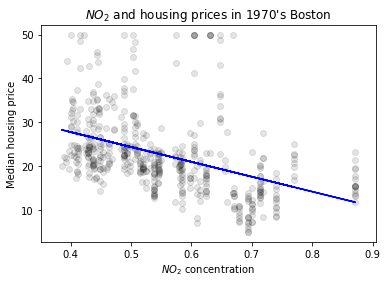

In [7]:
import numpy as np # Import numerical python routines

# One nuisance with numpy is that one may have to coerce the shape of an array to process it
one = np.ones((506,1))
x = np.reshape(x, (506, 1))

X = np.concatenate((one, x), axis=1) # Form the design matrix for the NO_2 levels 
beta = np.linalg.lstsq(X, y)[0] # Use the linear algebra least squares routine to compute the beta's
tilde_y = X @ beta # Form the approximate responses

plt.scatter(x,y, color='black', alpha=0.1) # Decreasing the alpha level can increase contrast/legibility
plt.plot(x, tilde_y, color='blue') # Add the regression line to the plot
plt.title('$NO_2$ and housing prices in 1970\'s Boston')
plt.xlabel('$NO_2$ concentration')
plt.ylabel('Median housing price')
plt.show()

### Algebraic Taylor expansion of SSE at $\beta^\ast$

We now use some algebra to derive a formula that we will later identify with the second order Taylor expansion of $SSE$ about a point $\beta^\ast$. Let $y$, $X$, and $\beta$ be as above, and suppose $\beta^\ast\in\mathbb{R}^2$. Then

$$
\begin{align}
\Vert y-X\beta\Vert_2^2 &= \Vert y-X\beta^\ast+X\beta^\ast-X\beta\Vert^2\\
&=  \Vert \underbrace{(y-X\beta^\ast)}_{=v}-\underbrace{X(\beta-\beta^\ast)}_{=w}\Vert^2\\
&= \Vert v-w\Vert^2\\
&= \Vert v\Vert^2 - 2 v^Tw + \Vert w\Vert^2\\
&= \Vert y-X\beta^\ast\Vert^2 - 2(y-X\beta^\ast)^T(X(\beta-\beta^\ast)) + \Vert X(\beta-\beta^\ast)\Vert^2\\
&= \Vert y-X\beta^\ast\Vert^2 - 2\left((y-X\beta^\ast)^TX\right)(\beta-\beta^\ast) + \Vert X(\beta-\beta^\ast)\Vert^2\\
&= \Vert y-X\beta^\ast\Vert^2 - 2\left((y-X\beta^\ast)^T(X^T)^T\right)(\beta-\beta^\ast) + \Vert X(\beta-\beta^\ast)\Vert^2\\
&= \Vert y-X\beta^\ast\Vert^2 - 2\left(X^T(y-X\beta^\ast)\right)^T(\beta-\beta^\ast) + \Vert X(\beta-\beta^\ast)\Vert^2\\
&= \Vert y-X\beta^\ast\Vert^2 - 2\left(X^Ty-X^TX\beta^\ast)\right)^T(\beta-\beta^\ast) + \Vert X(\beta-\beta^\ast)\Vert^2.\\
\end{align}
$$

Note that the first term on the right is constant with respect to $\beta$, the second term involves one copy of $\beta$, and the second term expands to $(\beta-\beta^\ast)^TX^TX(\beta-\beta^\ast)$, which involves two copies of $\beta$. 

## Necessary Conditions for Optimality

A necessary condition for optimality is such that, if $x^\ast\in\mathcal{X}$ minimizes $f$ over $\mathcal{X}$, then $x^\ast$ must satisfy the necessary condition. The contrapositive of this relationship is often useful: if the necessary condition is *not* satisfied by $x\in\mathcal{X}$, then $x$ cannot be a minimizer of $f$ over $\mathcal{X}$. In particular, a necessary condition tells us that we don't have to search the entire feasible region to find a solution -- we just need to look at the $x\in\mathcal{X}$ which satisfy the necessary condition.

We claim that the **normal equations**

$$
X^TX\beta^\ast=X^Ty
$$

form a necessary condition for optimality of $\beta^\ast$, and we will demonstrate this by proving the contrapositive.

#### Proof that the normal conditions are necessary for optimality

Suppose $X^TX\beta^\ast\not=X^Ty$, or equivalently $X^Ty-X^TX\beta^\ast\not=0$. In this case, will produce a $\delta>0$ such that

$$
\beta = \beta^\ast +\delta (X^Ty-X^TX\beta^\ast)
$$

satisfies $SSE(\beta) < SSE(\beta^\ast)$, and hence $\beta^\ast$ cannot be a minimizer of $SSE$ over $\mathbb{R}^2$.

If we substitute this expression for $\beta$ in

$$
(\ast)\hspace{5pt} \Vert y-X\beta\Vert_2^2  = \Vert y-X\beta^\ast\Vert_2^2-2\left(X^Ty-X^TX\beta^\ast\right)^T(\beta-\beta^\ast)+\Vert X(\beta-\beta^\ast)\Vert^2,
$$

we get

$$
\Vert y-X\beta\Vert_2^2 = \Vert y-X\beta^\ast\Vert_2^2 - 2\delta\Vert X^Ty-X^TX\beta^\ast\Vert_2^2+\delta^2\Vert X\left(X^Ty-X^TX\beta^\ast\right)\Vert_2^2.
$$

If $\Vert X\left(X^Ty-X^TX\beta^\ast\right)\Vert_2^2=0$, then

$$
\Vert y-X\beta\Vert_2^2 = \Vert y-X\beta^\ast\Vert_2^2 - 2\delta\Vert X^Ty-X^TX\beta^\ast\Vert_2^2 < \Vert y-X\beta^\ast\Vert_2^2
$$

for any $\delta>0$ since $X^Ty-X^TX\beta^\ast\not=0$ implies $\Vert X^Ty-X^TX\beta^\ast\Vert^2\not=0$. 

On the other hand, if $\Vert X\left(X^Ty-X^TX\beta^\ast\right)\Vert_2^2\not=0$, then 
$$
\Vert y-X\beta\Vert_2^2 = \Vert y-X\beta^\ast\Vert_2^2 - 2\delta\Vert X^Ty-X^TX\beta^\ast\Vert_2^2+\delta^2\Vert X\left(X^Ty-X^TX\beta^\ast\right)\Vert_2^2
$$
is minimal when $\delta = \frac{\Vert X^Ty-X^TX\beta^\ast\Vert_2^2}{\Vert X\left(X^Ty-X^TX\beta^\ast\right)\Vert_2^2}$. Substitution of this value for $\delta$ yields
$$
\Vert y-X\beta\Vert_2^2 = \Vert y-X\beta^\ast\Vert_2^2 - \frac{\Vert X^Ty-X^TX\beta^\ast\Vert_2^4}{\Vert X\left(X^Ty-X^TX\beta^\ast\right)\Vert_2^2} < \Vert y-X\beta^\ast\Vert_2^2.
$$
To summarize, if $\beta^\ast$ does not satisfy the normal equations, then we can always produce a $\beta$ such that $SSE(\beta) < SSEE(\beta^\ast)$, and hence $\beta^\ast$ does not minimize $SSE$ over $\mathbb{R}^2$.

## Sufficient Conditions for Optimality

We can also show that the normal equations are sufficient for optimality. That is, if $\beta^\ast$ satisfies the normal equations, then $\beta^\ast$ is a minimizer of $SSE$ over $\mathbb{R}^2$. Suppose

$$
X^TX\beta^\ast = X^Ty
$$

or equivalently,

$$
X^Ty-X^TX\beta^\ast=0.
$$

If $\beta^\ast$ satisfies this condition, $(\ast)$ becomes

$$
\Vert y-X\beta\Vert_2^2 - \Vert y-X\beta^\ast\Vert_2^2 = 2(0)^T(\beta^\ast-\beta)+\Vert X(\beta^\ast-\beta)\Vert^2=\Vert X(\beta^\ast-\beta)\Vert^2
$$

for all $\beta\in\mathbb{R}^2$. Recall that 

$$
\Vert X(\beta^\ast-\beta)\Vert^2= \left(X(\beta^\ast-\beta)\right)^T\left(X(\beta^\ast-\beta)\right)\geq 0
$$

by positive definiteness of the inner product. Therefore

$$
\Vert y-X\beta\Vert_2^2 - \Vert y-X\beta^\ast\Vert_2^2=\Vert X(\beta^\ast-\beta)\Vert^2\geq 0
$$

for all $\beta\in\mathbb{R}^2$. Rearranging $\Vert y-X\beta\Vert_2^2 - \Vert y-X\beta^\ast\Vert_2^2\geq 0$, we have

$$
\Vert y-X\beta\Vert_2^2 \geq \Vert y-X\beta^\ast\Vert_2^2
$$

for all $\beta\in\mathbb{R}^2$. Thus, $\beta^\ast$ minimizes $SSE$ over $\mathbb{R}^2$. 

## Example

Suppose our data is $\{(x_i,y_i)\}_{i=1}^5=\{(1, 2), (1, 1), (0,-1), (-1, 1), (0,2)\}$. Then the design matrix is

$$
X = \begin{pmatrix} 1 & 1\\ 1&1\\ 0 & 0\\ 1 &-1\\ 1 & 0\end{pmatrix} 
$$

and the response vector is

$$
y = \begin{pmatrix}
2\\ 1\\-1\\1\\2
\end{pmatrix}.
$$

Then

$$
\begin{align}
X^TX &= \begin{pmatrix} 1 & 1 & 1 & 1 & 1\\ 1 & 1 & 0 & -1 & 0\end{pmatrix}\begin{pmatrix} 1 & 1\\ 1&1\\ 0 & 0\\ 1 &-1\\ 1 & 0\end{pmatrix}\\
&=\begin{pmatrix}
(1)(1)+(1)(1)+(1)(1)+(1)(1)+(1)(1) & (1)(1)+(1)(1)+(1)(0)+(1)(-1)+(1)(0)\\
(1)(1)+(1)(1)+(0)(1)+(-1)(1)+(0)(1) & 1)(1)+(1)(1)+(0)(0)+(-1)(-1)+(0)(0)
\end{pmatrix}\\
&=\begin{pmatrix} 5 & 1\\ 1 & 3\end{pmatrix},
\end{align}
$$

and

$$
\begin{align}
X^Ty &= \begin{pmatrix} 1 & 1 & 1 & 1 & 1\\ 1 & 1 & 0 & -1 & 0\end{pmatrix}\begin{pmatrix}
2\\ 1\\-1\\1\\2\end{pmatrix}\\
&=\begin{pmatrix} (1)(2)+(1)(1)+(1)(-1)+(1)(1)+(1)(2)\\ (1)(2)+(1)(1)+(0)(-1)+(-1)(1)+(0)(2)
\end{pmatrix}\\
&=\begin{pmatrix}5\\2\end{pmatrix}.
\end{align}
$$

Therefore the normal equations reduce to

$$
\begin{align}
5\beta_0 + \beta_1 = 5\\
\beta_0 + 3\beta_1 = 2
\end{align}
$$

The first equation implies that $\beta_1=5-5\beta_0$. Substitution into the second equations gives

$$
\beta_0 + 3(5-5\beta_0)=2 \Leftrightarrow 15-14\beta_0=2\Leftrightarrow \beta_0=\frac{13}{14}.
$$

Substitution back into our expression for $\beta_1$ in terms of $\beta_0$ gives

$$
\beta_1 = 5 - 5 \frac{13}{14}=5\left(1-\frac{13}{14}\right)= \frac{5}{14}.
$$

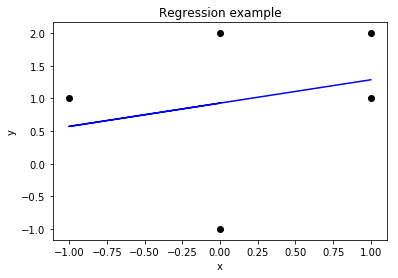

In [9]:
x = np.array([1, 1, 0, -1, 0])
y = np.array([2, 1, -1, 1, 2])
beta = np.array([13/14, 5/14])
y_hat = beta[0] + beta[1]*x

plt.scatter(x,y, color='black')
plt.plot(x, y_hat, color='blue')
plt.title('Regression example')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Summary

1. We introduced fundamental definitions for optimization
2. We introduced the least squares regression problem as a minimization program
3. We covered fundamental definitions for matrix arithmetic
4. We showed how to represent the sum of squares error function compactly using matrix notation
5. We used this compact notation to show that normal equations are necessary and sufficient for optimality